In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

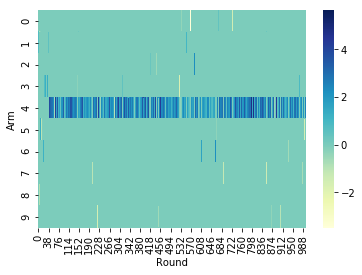

The average return acheived is  1.88841715178


In [88]:
# Draw u from Gaussian(0,1), i = 1,...,10 (unknown to agent) 
# arms = number of possible of actions (known to agent)
arms = 10
u = np.random.randn(arms,1) 

# Rewards of action i at time t => x_i(t) ~ N(u_i,1)
# x_i(t) is itself randomly drawn, so it's not deterministic
rounds = 1000
x = np.zeros((rounds,1))

# Initialize Q: agent's record of rewards
# Initialize estQ: agent's estimate of rewards
Q = np.zeros((arms, rounds))
estQ = np.zeros((arms,1))

# Initialize the first column of Q with randomly drawn "expectations" 
# Set probability of exploring at whatever %. 
Q[:,0] = 0.01 # np.random.randn(arms) 
exploreProbability = 0.1

# Initialize rolling_sum and average returns! 
rolling_sum = 0
avg_returns = []

for time in range(rounds): 
  
    # Estimate return belief for each arm
    # Belief => Q_t(a) = sum of rewards / number of times action taken
    for i in range(arms): 
        estQ[i] = sum(Q[i,:])/np.count_nonzero(Q[i,:])
    
    if np.random.uniform(0,1) > exploreProbability: 
        
        # argmax(estQ) chooses the row (arm) with the highest value
        # np.random.normal(u[chosenLever],1) generates N(u_i,1) 
        chosenLever = np.argmax(estQ) 
        Q[chosenLever, time] = np.random.normal(u[chosenLever],1)
        rolling_sum += Q[chosenLever,time] 
        avg_returns.append(rolling_sum/(time+1)) # because time starts at 0!
        
    else: # go exploring
        chosenLever = np.random.choice(arms)
        Q[chosenLever, time] = np.random.normal(u[chosenLever],1)
        rolling_sum += Q[chosenLever,time] 
        avg_returns.append(rolling_sum/(time+1))
        
# Determine average return
average_return = rolling_sum/(rounds)
        
# Create the plot. 
ax = sns.heatmap(Q, annot = False, cmap="YlGnBu") #, linewidth=0)
plt.ylabel('Arm')
plt.xlabel('Round') 
plt.show()

print("The average return acheived is ", average_return)

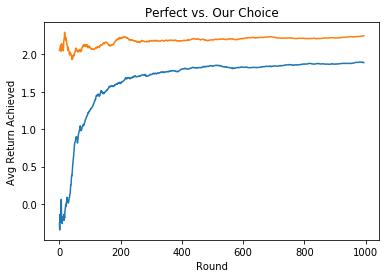

[ 2.2462504]
The mean for optimal was  [ 2.24553443]


In [89]:
## Optimal Play!

# Determine the "ideal" arm to pick, label ideal_pick
ideal_pick = np.argmax(u)

# Initialize avg_perfect = list, records the average return achieved at time t
# Initialize rolling_perfect = cumulative run you achieve
avg_perfect = []
rolling_perfect = 0

for time in range(rounds):
    rolling_perfect += np.random.normal(u[ideal_pick],1)
    avg_perfect.append(rolling_perfect/(time+1))
    
plt.plot(avg_returns[5:])
plt.plot(avg_perfect[5:])
plt.title("Perfect vs. Our Choice")
plt.ylabel('Avg Return Achieved') 
plt.xlabel('Round')
plt.show()

final_avg_perfect_return = rolling_perfect/rounds
print(final_avg_perfect_return) 
print("The mean for optimal was ", u[ideal_pick])


we picked arm  4
the optimal arm was  4
We picked the optimal arm with a probability of  87.7 %.


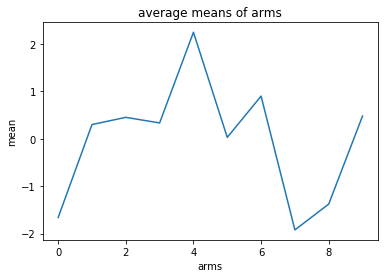

In [90]:
## Did we pick the right arm? 

non_zero_elements = (Q != 0).sum(1) # this creates an array of the # of non-zero occurences
most_picked_arm = np.argmax(non_zero_elements)

print("we picked arm ", most_picked_arm)
print("the optimal arm was ", ideal_pick)

plt.plot(u)
plt.title("average means of arms")
plt.ylabel("mean") 
plt.xlabel("arms")

# How many times did you pick the optimal arm? 
# (Q[most_picked_arm,:]).sum(1) # finds the # of non-zero occurrences in the most_picked_arm
our_accuracy = (Q[ideal_pick,:] != 0).sum(0)/rounds *100
print("We picked the optimal arm with a probability of ", our_accuracy, "%.")